CIFAR-10 영상 분류하기

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

# CFAR-10 데이터 세트를 적재한다.
# 훈련 세트와 테스트 세트를 반환받는다. 
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


영상 화면 표시

In [ ]:
# 두 번째 영상(트럭)을 화면에 표시한다. 
plt.figure()
plt.imshow(X_train[111])
plt.colorbar()

# 영상의 픽셀 값을 0에서 1 사이로 변환한다. 
X_train = X_train/255.0
X_test = X_test/255.0

print (y_train[111])

CNN 신경망 모델 구축

In [ ]:
# 순차 모델을 구축한다. 
model = Sequential()
model.add(Conv2D(64, activation = 'relu', kernel_size = (3,3 )))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, activation = 'relu', kernel_size = (3,3 )))
model.add(Flatten(input_shape = (32, 32, 3)))
model.add(Dense(80, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))


Model Compile

In [ ]:
# 모델을 컴파일한다. 
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])


학습 실행

In [ ]:
# 모델을 훈련한다. 
history = model.fit(X_train, y_train, epochs=10, verbose=1, 
                  validation_split=0.3)


Epoch 1/10
1094/1094 [==============================] - 64s 57ms/step - loss: 1.4945 - accuracy: 0.4630 - val_loss: 1.3011 - val_accuracy: 0.5386
Epoch 2/10
1094/1094 [==============================] - 62s 56ms/step - loss: 1.1438 - accuracy: 0.5972 - val_loss: 1.1760 - val_accuracy: 0.5938
Epoch 3/10
1094/1094 [==============================] - 61s 56ms/step - loss: 0.9937 - accuracy: 0.6495 - val_loss: 1.0130 - val_accuracy: 0.6447
Epoch 4/10
1094/1094 [==============================] - 60s 55ms/step - loss: 0.8951 - accuracy: 0.6877 - val_loss: 0.9993 - val_accuracy: 0.6492
Epoch 5/10
1094/1094 [==============================] - 60s 55ms/step - loss: 0.8029 - accuracy: 0.7187 - val_loss: 0.9718 - val_accuracy: 0.6603
Epoch 6/10
1094/1094 [==============================] - 60s 55ms/step - loss: 0.7385 - accuracy: 0.7407 - val_loss: 1.0222 - val_accuracy: 0.6576
Epoch 7/10
1094/1094 [==============================] - 60s 55ms/step - loss: 0.6615 - accuracy: 0.7704 - val_loss: 0.9918 -

손실값을 그래프로 그린다.

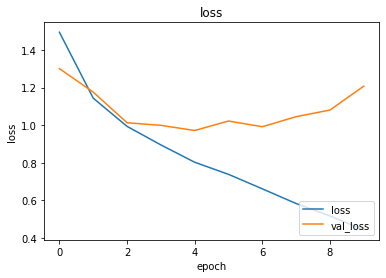

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc = 'lower right')
plt.show()


TEST

정답= [3]
예측값= [5.2042124e-06 4.6078608e-07 7.3040610e-07 9.9487394e-01 1.3324003e-05
 7.5804873e-04 4.1319691e-03 2.6870339e-09 2.0723960e-04 9.0482717e-06]


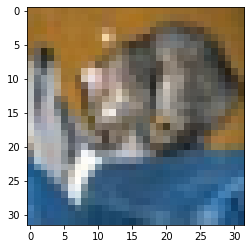

In [ ]:
plt.figure()
plt.imshow(X_test[0])
y_pred = model.predict(X_test)
print("정답=", y_test[0])
print("예측값=", y_pred[0])